In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv("course_lead_scoring.csv")
df

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [62]:
df.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
count,1462.000000,1281.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108,0.619015
std,1.449717,15070.140389,1.681564,0.288465,0.485795
min,0.000000,13929.000000,0.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500,0.000000
50%,2.000000,60148.000000,3.000000,0.510000,1.000000
75%,3.000000,69639.000000,4.000000,0.750000,1.000000
max,9.000000,109899.000000,11.000000,1.000000,1.000000


In [63]:
missing_counts = df.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]
missing_columns

lead_source          128
industry             134
annual_income        181
employment_status    100
location              63
dtype: int64

In [64]:
missing_cols = [c for c in df.columns if df[c].isnull().any()]
missing_cols

['lead_source', 'industry', 'annual_income', 'employment_status', 'location']

Data preparation

    Check if the missing values are presented in the features.
    If there are missing values:
        For caterogiral features, replace them with 'NA'
        For numerical features, replace with with 0.0

In [65]:
from pandas.api.types import is_numeric_dtype

# check for missing values and fill according to type:
missing_cols = [c for c in df.columns if df[c].isnull().any()]

if not missing_cols:
    print("No missing values found.")
else:

    for col in missing_cols:
        if is_numeric_dtype(df[col]):
            df[col].fillna(0.0, inplace=True)
        else:
            df[col].fillna('NA', inplace=True)

    # update the helper summaries
    missing_counts = df.isnull().sum()
    missing_columns = missing_counts[missing_counts > 0]

    print("Filled missing values for columns:", missing_cols)
    print("Remaining missing values (should be none):")
    print(missing_columns)

Filled missing values for columns: ['lead_source', 'industry', 'annual_income', 'employment_status', 'location']
Remaining missing values (should be none):
Series([], dtype: int64)


/var/folders/mf/rdhh117n5g95h3nm4hzvkftc0000gn/T/ipykernel_15277/3299408368.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NA', inplace=True)
/var/folders/mf/rdhh117n5g95h3nm4hzvkftc0000gn/T/ipykernel_15277/3299408368.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

What is the most frequent observation (mode) for the column industry?

    NA
    technology
    healthcare
    retail


In [66]:
industry_mode = df['industry'].mode()[0]
industry_mode

'retail'

Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

    interaction_count and lead_score
    number_of_courses_viewed and lead_score
    number_of_courses_viewed and interaction_count
    annual_income and interaction_count

Only consider the pairs above when answering this question.
Split the data

    Split your data in train/val/test sets with 60%/20%/20% distribution.
    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
    Make sure that the target value y is not in your dataframe.


Correlation matrix (numerical features):
                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   
converted                                 0.435914       0.053131   

                          interaction_count  lead_score  converted  
number_of_courses_viewed          -0.023565   -0.004879   0.435914  
annual_income                      0.027036    0.015610   0.053131  
interaction_count                  1.000000    0.009888   0.374573  
lead_score                         0.009888    1.000000   0.193673  
converted                          0.374573    0.193673   1.000000  

Requested pair correlations:
interaction_count vs lead_score: 0.009888182496913105
number_of_courses_viewed vs lead_score: -0.004

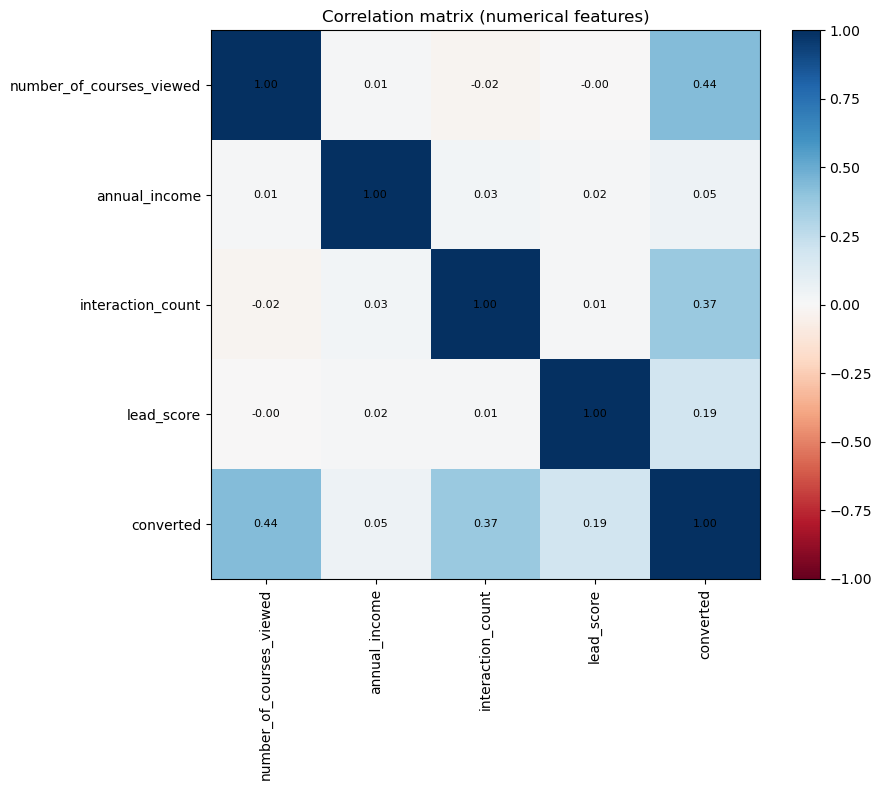

/var/folders/mf/rdhh117n5g95h3nm4hzvkftc0000gn/T/ipykernel_15277/179419496.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


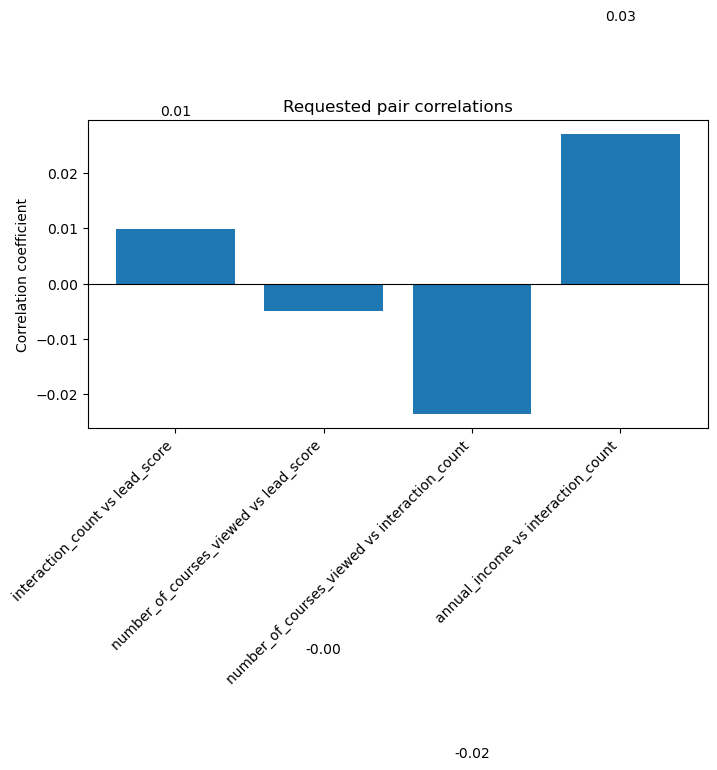


Shapes:
X_train, y_train: (877, 8) (877,)
X_val,   y_val:   (292, 8) (292,)
X_test,  y_test:  (293, 8) (293,)


In [67]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# 1) Correlation matrix for numerical features
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
print("Correlation matrix (numerical features):")
print(corr)

# Evaluate only the specified pairs
pairs = [
    ('interaction_count', 'lead_score'),
    ('number_of_courses_viewed', 'lead_score'),
    ('number_of_courses_viewed', 'interaction_count'),
    ('annual_income', 'interaction_count')
]

pair_corrs = {}
for a, b in pairs:
    if a in corr.index and b in corr.columns:
        pair_corrs[(a, b)] = corr.loc[a, b]
    else:
        pair_corrs[(a, b)] = float('nan')

print("\nRequested pair correlations:")
for (a, b), val in pair_corrs.items():
    print(f"{a} vs {b}: {val}")

# Determine the pair with the largest absolute correlation (among the listed pairs)
valid_items = {k: v for k, v in pair_corrs.items() if not np.isnan(v)}
if valid_items:
    best_pair, best_val = max(valid_items.items(), key=lambda kv: abs(kv[1]))
    print(f"\nPair with the biggest correlation (by absolute value): {best_pair} -> correlation = {best_val}")
else:
    print("\nNone of the specified pairs are present in the numeric columns.")

# 2) Plot correlation matrix using pyplot (heatmap with annotations)
plt.figure(figsize=(10, 8))
im = plt.imshow(corr.values, cmap='RdBu', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
cols = corr.columns.tolist()
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)
# annotate values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)
plt.title("Correlation matrix (numerical features)")
plt.tight_layout()
plt.show()

# 3) Bar plot of the requested pair correlations (showing signed values)
labels = [f"{a} vs {b}" for (a, b) in pairs]
vals = [pair_corrs[(a, b)] for (a, b) in pairs]

# Prepare plotting values, mark NaNs
x = range(len(labels))
plt.figure(figsize=(8, 4))
bar_colors = ['tab:blue' if not np.isnan(v) else 'lightgray' for v in vals]
# replace NaN with 0 for plotting but annotate as NaN
plot_vals = [0.0 if np.isnan(v) else v for v in vals]
bars = plt.bar(x, plot_vals, color=bar_colors)
plt.axhline(0, color='k', linewidth=0.8)
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel("Correlation coefficient")
for idx, v in enumerate(vals):
    text = "NaN" if np.isnan(v) else f"{v:.2f}"
    plt.text(idx, plot_vals[idx] + (0.02 if plot_vals[idx] >= 0 else -0.06), text, ha='center', va='bottom' if plot_vals[idx] >= 0 else 'top')
plt.title("Requested pair correlations")
plt.tight_layout()
plt.show()

# 4) Split the data into train/val/test (60/20/20). Ensure target y is separated from X.
target_name = 'lead_score'
if target_name not in df.columns:
    raise KeyError(f"Target column '{target_name}' not found in dataframe.")

y = df[target_name]
X = df.drop(columns=[target_name])

# First split: train (60%) and temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: split temp into val (50% of temp => 20% total) and test (50% of temp => 20% total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nShapes:")
print("X_train, y_train:", X_train.shape, y_train.shape)
print("X_val,   y_val:  ", X_val.shape, y_val.shape)
print("X_test,  y_test: ", X_test.shape, y_test.shape)

# Sanity check: ensure target not present in feature dataframes
assert target_name not in X_train.columns
assert target_name not in X_val.columns
assert target_name not in X_test.columns

Question 3

    Calculate the mutual information score between y and other categorical variables in the dataset. Use the training set only.
    Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

    industry
    location
    lead_source
    employment_status


In [68]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# candidate categorical variables to evaluate
cats = ['industry', 'location', 'lead_source', 'employment_status']

mi_scores = {}
for col in cats:
    if col not in X_train.columns:
        mi_scores[col] = None
        print(f"Column '{col}' not found in training features.")
        continue
    # encode categorical column (including any 'NA' placeholders)
    enc = LabelEncoder()
    col_encoded = enc.fit_transform(X_train[col].astype(str))
    # mutual_info_regression returns an array; set discrete_features=True for categorical input
    mi = mutual_info_regression(col_encoded.reshape(-1, 1), y_train, discrete_features=True, random_state=42)[0]
    mi_scores[col] = round(mi, 2)

print("\nMutual information scores (training set):")
for col, score in mi_scores.items():
    print(f"{col}: {score}")

# determine the variable with the biggest MI (ignore None)
valid_scores = {k: v for k, v in mi_scores.items() if v is not None}
if valid_scores:
    best_col = max(valid_scores.items(), key=lambda kv: kv[1])[0]
    print(f"\nVariable with the biggest mutual information score: {best_col}")
else:
    print("\nNo valid categorical columns found to compute mutual information.")


Mutual information scores (training set):
industry: 0
location: 0.02
lead_source: 0
employment_status: 0.02

Variable with the biggest mutual information score: location


In [69]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", list(categorical_columns))


Categorical columns: ['lead_source', 'industry', 'employment_status', 'location']


In [70]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", list(numerical_columns))

Numerical columns: ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']


Question 4

    Now let's train a logistic regression.
    Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
    Fit the model on the training dataset.
        To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
        model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

    0.64
    0.74
    0.84
    0.94


In [ ]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [88]:

categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=[np.number]).columns

train_dict = X_train[categorical_columns.tolist() + numerical_columns.tolist()].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train_enc = dv.transform(X_train[categorical_columns.tolist() + numerical_columns.tolist()].to_dict(orient='records'))
X_val_enc = dv.transform(X_val[categorical_columns.tolist() + numerical_columns.tolist()].to_dict(orient='records'))
# Ensure target variable contains discrete class labels
y_train = y_train.round().astype(int)
y_val = y_val.round().astype(int)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_enc, y_train)
y_val_pred = model.predict(X_val_enc)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy:.2f}")

Validation accuracy: 0.60


Question 5

    Let's find the least useful feature using the feature elimination technique.
    Train a model using the same features and parameters as in Q4 (without rounding).
    Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
    For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

    'industry'
    'employment_status'
    'lead_score'

    Note: The difference doesn't have to be positive.


In [89]:
# Original accuracy from Q4
original_accuracy = val_accuracy

# Features to evaluate
features_to_check = ['industry', 'employment_status', 'lead_score']

# Dictionary to store accuracy differences
accuracy_differences = {}

for feature in features_to_check:
    if feature not in X_train.columns:
        print(f"Feature '{feature}' not found in training features.")
        accuracy_differences[feature] = None
        continue

    # Drop the feature from the training and validation sets
    X_train_reduced = X_train.drop(columns=[feature])
    X_val_reduced = X_val.drop(columns=[feature])

    # Encode the reduced datasets
    train_dict_reduced = X_train_reduced.to_dict(orient='records')
    val_dict_reduced = X_val_reduced.to_dict(orient='records')
    X_train_enc_reduced = dv.transform(train_dict_reduced)
    X_val_enc_reduced = dv.transform(val_dict_reduced)

    # Train the model on the reduced dataset
    model_reduced = LogisticRegression(solver='liblinear', random_state=42)
    model_reduced.fit(X_train_enc_reduced, y_train)
    y_val_pred_reduced = model_reduced.predict(X_val_enc_reduced)

    # Calculate accuracy on the reduced validation set
    reduced_accuracy = accuracy_score(y_val, y_val_pred_reduced)

    # Calculate the difference in accuracy
    accuracy_differences[feature] = original_accuracy - reduced_accuracy

# Print the accuracy differences
print("\nAccuracy differences:")
for feature, diff in accuracy_differences.items():
    print(f"{feature}: {diff:.4f}" if diff is not None else f"{feature}: Not evaluated")

# Find the feature with the smallest difference
valid_differences = {k: v for k, v in accuracy_differences.items() if v is not None}
if valid_differences:
    least_impactful_feature = min(valid_differences.items(), key=lambda kv: abs(kv[1]))[0]
    print(f"\nFeature with the smallest difference: {least_impactful_feature}")
else:
    print("\nNo valid features were evaluated.")

Feature 'lead_score' not found in training features.

Accuracy differences:
industry: -0.0068
employment_status: 0.0103
lead_score: Not evaluated

Feature with the smallest difference: industry


Question 6

    Now let's train a regularized logistic regression.
    Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
    Train models using all the features as in Q4.
    Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

    0.01
    0.1
    1
    10
    100



In [90]:
# Values of C to evaluate
C_values = [0.01, 0.1, 1, 10, 100]

# Dictionary to store validation accuracies for each C
validation_accuracies = {}

for C in C_values:
    # Train a logistic regression model with the given C
    model = LogisticRegression(solver='liblinear', C=C, random_state=42)
    model.fit(X_train_enc, y_train)
    y_val_pred = model.predict(X_val_enc)

    # Calculate accuracy on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies[C] = round(val_accuracy, 3)

# Print the validation accuracies for each C
print("\nValidation accuracies for different values of C:")
for C, acc in validation_accuracies.items():
    print(f"C={C}: {acc}")

# Find the C value with the best accuracy
best_C = max(validation_accuracies.items(), key=lambda kv: kv[1])[0]
print(f"\nBest C value: {best_C}")


Validation accuracies for different values of C:
C=0.01: 0.565
C=0.1: 0.582
C=1: 0.599
C=10: 0.599
C=100: 0.599

Best C value: 1
